In [2]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Init Plugin
Init Graph Optimizer
Init Kernel


In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Data Preprocessing

In [4]:
X_train = X_train/225
X_test = X_test/225

In [5]:
from tensorflow.keras.utils import to_categorical

y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

# Random Search Hyperparameters

In [6]:
keras.backend.clear_session()
InitSeed = 767
tf.random.set_seed(InitSeed)
np.random.seed(InitSeed)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.initializers import RandomNormal, Constant
from tensorflow.keras.optimizers import Nadam, RMSprop


from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_model(neurons1, neurons2,neurons3, neurons4, activation, optimizer, init_mode, dropout_rate):
    
    # create model
    model = Sequential()
    model.add(Flatten(input_shape=[32,32,3]))
    
    model.add(Dense(neurons1, activation=activation, kernel_initializer=init_mode))
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(neurons2, activation=activation, kernel_initializer=init_mode))
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(neurons3, activation=activation, kernel_initializer=init_mode))
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(neurons4, activation=activation, kernel_initializer=init_mode))
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(10, activation='softmax'))
    
    # Compile model
    model.compile(loss="categorical_crossentropy", 
                    optimizer=optimizer,  # OPTIMIZER
                    metrics=["accuracy"]) # Accuracy performance metric
    return model

# Create Hyperparameters 
epochs = [50, 100, 150]
optimizer = ['Adadelta', 'Adagrad', 'Adamax','RMSprop', 'Nadam']
neurons1 = [256, 512, 1024, 2048, 3072]
neurons2 = [256, 512, 1024, 2048]
neurons3 = [256, 512, 1024, 2048]
neurons4 = [256, 512, 1024, 2048]
batch_size = [500, 750, 1000]
activation = ['elu', 'relu', 'selu']
init_mode = ['uniform', 'lecun_uniform', 'zero', 
             'glorot_uniform', 'he_normal', 'he_uniform']

dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0)

# Create hyperparameter options
param_grid = dict(neurons1=neurons1, neurons3= neurons3, neurons2=neurons2, neurons4=neurons4, activation= activation,
                 optimizer = optimizer, init_mode = init_mode, dropout_rate = dropout_rate, 
                  epochs = epochs, batch_size = batch_size)

In [6]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV

rand = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                            n_iter=4, n_jobs=-1) 

rand_output = rand.fit(X_test, y_cat_test) # Search results based on the “test” data 
print("Best: {} using {}".format(rand_output.best_score_, rand_output.best_params_))

Init Plugin
Init Graph Optimizer
Init Kernel
Init Plugin
Init Graph Optimizer
Init Kernel
Init Plugin
Init Graph Optimizer
Init Kernel
Init Plugin
Init Graph Optimizer
Init Kernel
Init Plugin
Init Graph Optimizer
Init Kernel
Init Plugin
Init Graph Optimizer
Init Kernel
Init Plugin
Init Graph Optimizer
Init Kernel
Init Plugin
Init Graph Optimizer
Init Kernel
Metal device set to: Apple M1
Metal device set to: Apple M1


2021-11-04 10:32:04.066790: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-04 10:32:04.067136: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-11-04 10:32:04.073332: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-04 10:32:04.073434: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL,

Metal device set to: Apple M1
Metal device set to: Apple M1


2021-11-04 10:32:04.341650: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-04 10:32:04.341773: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-04 10:32:04.341864: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-11-04 10:32:04.342005: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL,

Metal device set to: Apple M1
Metal device set to: Apple M1
Metal device set to: Apple M1
Metal device set to: Apple M1


2021-11-04 10:32:04.925971: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-04 10:32:04.926828: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-11-04 10:32:04.950016: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-04 10:32:04.952013: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-04 10:32:04.952323: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-11-04 10:32:04.958323: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-11-04 10:32:05.385816: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-04 10

Metal device set to: Apple M1


2021-11-04 10:38:29.077814: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-04 10:38:29.078023: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-11-04 10:38:29.303399: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-04 10:38:29.303656: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-11-04 10:38:29.465053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Best: 0.36480002403259276 using {'optimizer': 'RMSprop', 'neurons4': 2048, 'neurons3': 512, 'neurons2': 1024, 'neurons1': 1024, 'init_mode': 'uniform', 'epochs': 150, 'dropout_rate': 0.4, 'batch_size': 500, 'activation': 'elu'}


In [7]:
best_para = rand_output.best_params_
best_para

{'optimizer': 'RMSprop',
 'neurons4': 2048,
 'neurons3': 512,
 'neurons2': 1024,
 'neurons1': 1024,
 'init_mode': 'uniform',
 'epochs': 150,
 'dropout_rate': 0.4,
 'batch_size': 500,
 'activation': 'elu'}

# Random Search Hyperparameters to find Learning Rate

In [8]:
# To save time decided to use LR = 0.001
"""
def create_model_new(learn_rate):
    
    # create model
    model = Sequential()
    model.add(Flatten(input_shape=[32,32,3]))
    
    model.add(Dense(best_para['neurons1'], activation=best_para['activation'], 
                    kernel_initializer=best_para['init_mode'])) # Layer 1
    model.add(Dropout(best_para['dropout_rate']))

    model.add(Dense(best_para['neurons2'], activation=best_para['activation'], 
                    kernel_initializer=best_para['init_mode'])) # Layer 2
    model.add(Dropout(best_para['dropout_rate']))
    
    model.add(Dense(best_para['neurons3'], activation=best_para['activation'], 
                    kernel_initializer=best_para['init_mode'])) # Layer 3
    model.add(Dropout(best_para['dropout_rate']))
    
    model.add(Dense(best_para['neurons4'], activation=best_para['activation'], 
                    kernel_initializer=best_para['init_mode'])) # Layer 4
    model.add(Dropout(best_para['dropout_rate']))

    model.add(Dense(10, activation='softmax')) # Output layer

    model.compile(loss='categorical_crossentropy',
                  optimizer= Nadam(learning_rate=learn_rate),
                  metrics=['accuracy']) 

    return model
    
"""

"\ndef create_model_new(learn_rate):\n    \n    # create model\n    model = Sequential()\n    model.add(Flatten(input_shape=[32,32,3]))\n    \n    model.add(Dense(best_para['neurons1'], activation=best_para['activation'], \n                    kernel_initializer=best_para['init_mode'])) # Layer 1\n    model.add(Dropout(best_para['dropout_rate']))\n\n    model.add(Dense(best_para['neurons2'], activation=best_para['activation'], \n                    kernel_initializer=best_para['init_mode'])) # Layer 2\n    model.add(Dropout(best_para['dropout_rate']))\n    \n    model.add(Dense(best_para['neurons3'], activation=best_para['activation'], \n                    kernel_initializer=best_para['init_mode'])) # Layer 3\n    model.add(Dropout(best_para['dropout_rate']))\n    \n    model.add(Dense(best_para['neurons4'], activation=best_para['activation'], \n                    kernel_initializer=best_para['init_mode'])) # Layer 4\n    model.add(Dropout(best_para['dropout_rate']))\n\n    model.add

In [9]:
"""
model = KerasClassifier(build_fn=create_model_new, epochs=best_para['epochs'], 
                        batch_size=best_para['batch_size'], verbose=0)

learn_rate = [0.001, 0.01, 0.03, 0.1, 0.3]
param_grid = dict(learn_rate=learn_rate)

from sklearn.model_selection import RandomizedSearchCV

rand = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                            n_iter=4, n_jobs=-1) 
import warnings
warnings.filterwarnings('ignore')
rand_output = rand.fit(X_test, y_cat_test) # Search results based on the “test” data 
print("Best: {} using {}".format(rand_output.best_score_, rand_output.best_params_))
"""

'\nmodel = KerasClassifier(build_fn=create_model_new, epochs=best_para[\'epochs\'], \n                        batch_size=best_para[\'batch_size\'], verbose=0)\n\nlearn_rate = [0.001, 0.01, 0.03, 0.1, 0.3]\nparam_grid = dict(learn_rate=learn_rate)\n\nfrom sklearn.model_selection import RandomizedSearchCV\n\nrand = RandomizedSearchCV(estimator=model, param_distributions=param_grid, \n                            n_iter=4, n_jobs=-1) \nimport warnings\nwarnings.filterwarnings(\'ignore\')\nrand_output = rand.fit(X_test, y_cat_test) # Search results based on the “test” data \nprint("Best: {} using {}".format(rand_output.best_score_, rand_output.best_params_))\n'

In [10]:
#best_para['learn_rate'] = rand_output.best_params_['learn_rate']
best_para['learn_rate'] = 0.001
best_para

{'optimizer': 'RMSprop',
 'neurons4': 2048,
 'neurons3': 512,
 'neurons2': 1024,
 'neurons1': 1024,
 'init_mode': 'uniform',
 'epochs': 150,
 'dropout_rate': 0.4,
 'batch_size': 500,
 'activation': 'elu',
 'learn_rate': 0.001}

## MLP structure without Batch Normalization

In [7]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix, accuracy_score

def metrics(y_test, y_cat_test, predictions, model):
    import warnings
    warnings.filterwarnings('ignore')
    
    print("############################ Classification Report ############################\n\n",
          classification_report(y_test, predictions))
    
    plt.figure(figsize=(15,6))
    sns.heatmap(confusion_matrix(y_test,predictions),annot=True,cmap="Blues" ,fmt='g')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix')
    plt.show()
    
    metrics_data = (model.evaluate(X_test, y_cat_test,verbose=0))
    
    print("Accuracy: {}%".format(round(metrics_data[1] * 100 ,2 )))
    print("Loss: {}\n".format(metrics_data[0]))

In [8]:
early_stop = EarlyStopping(monitor='val_accuracy',mode = "max", patience=7, verbose=1)

In [9]:
keras.backend.clear_session()
InitSeed = 767
tf.random.set_seed(InitSeed)
np.random.seed(InitSeed)

# Time-based decay
initial_learning_rate = 0.1
epoch = 150
decay = initial_learning_rate / epoch
def lr_scheduler(epoch, learning_rate):
    return learning_rate * 1 / (1 + decay * epoch)

In [23]:
## MLP structure without BatchNormalization
def my_design():

    model = Sequential()
    model.add(Flatten(input_shape=[32,32,3]))
    
    model.add(Dense(1024, activation='elu', kernel_initializer='uniform')) # Layer 1
    model.add(Dropout(0.4))

    model.add(Dense(1024, activation='elu', kernel_initializer='uniform')) # Layer 2
    model.add(Dropout(0.4))
    
    model.add(Dense(512, activation='elu', kernel_initializer='uniform')) # Layer 3
    model.add(Dropout(0.4))
    
    model.add(Dense(2048, activation='elu', kernel_initializer='uniform')) # Layer 4
    model.add(Dropout(0.4))

    model.add(Dense(10, activation='softmax')) # Output layer

    model.compile(loss='categorical_crossentropy',
                  optimizer= Nadam(learning_rate=0.001),
                  metrics=['accuracy']) 

    model.fit(X_train, y_cat_train, epochs=150, batch_size = 500, validation_data=(X_test, y_cat_test), 
              callbacks=[early_stop, LearningRateScheduler(lr_scheduler, verbose=1)])
    
    return model

In [24]:
mlp = my_design()
losses = pd.DataFrame(mlp.history.history)

Epoch 1/150

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.


2021-11-04 14:41:41.405728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 2.9866 - accuracy: 0.1455

2021-11-04 14:41:46.857415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 6s 56ms/step - loss: 2.9866 - accuracy: 0.1455 - val_loss: 2.1416 - val_accuracy: 0.2384
Epoch 2/150

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0009993338249474864.
100/100 [==============================] - 5s 53ms/step - loss: 2.3356 - accuracy: 0.1902 - val_loss: 2.0392 - val_accuracy: 0.2322
Epoch 3/150

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000998003131768278.
100/100 [==============================] - 5s 53ms/step - loss: 2.1516 - accuracy: 0.2378 - val_loss: 1.8691 - val_accuracy: 0.3104
Epoch 4/150

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0009960111531758023.
100/100 [==============================] - 5s 53ms/step - loss: 2.0396 - accuracy: 0.2721 - val_loss: 1.9493 - val_accuracy: 0.2959
Epoch 5/150

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0009933622269717819.
100/100 [==============================] - 5s 53ms/step - loss: 1.9649 - accuracy: 0.

100/100 [==============================] - 5s 54ms/step - loss: 1.2735 - accuracy: 0.5410 - val_loss: 1.2896 - val_accuracy: 0.5425
Epoch 38/150

Epoch 00038: LearningRateScheduler reducing learning rate to 0.0006282551475560018.
100/100 [==============================] - 5s 54ms/step - loss: 1.2636 - accuracy: 0.5446 - val_loss: 1.2939 - val_accuracy: 0.5389
Epoch 39/150

Epoch 00039: LearningRateScheduler reducing learning rate to 0.0006127325744974888.
100/100 [==============================] - 5s 53ms/step - loss: 1.2594 - accuracy: 0.5503 - val_loss: 1.2896 - val_accuracy: 0.5369
Epoch 40/150

Epoch 00040: LearningRateScheduler reducing learning rate to 0.0005972052113739428.
100/100 [==============================] - 5s 53ms/step - loss: 1.2448 - accuracy: 0.5550 - val_loss: 1.2612 - val_accuracy: 0.5502
Epoch 41/150

Epoch 00041: LearningRateScheduler reducing learning rate to 0.0005816933646036143.
100/100 [==============================] - 5s 53ms/step - loss: 1.2307 - accurac

Epoch 73/150

Epoch 00073: LearningRateScheduler reducing learning rate to 0.0001782735695045811.
100/100 [==============================] - 5s 53ms/step - loss: 0.9433 - accuracy: 0.6583 - val_loss: 1.1914 - val_accuracy: 0.5840
Epoch 74/150

Epoch 00074: LearningRateScheduler reducing learning rate to 0.00017000021949085985.
100/100 [==============================] - 5s 53ms/step - loss: 0.9372 - accuracy: 0.6626 - val_loss: 1.1964 - val_accuracy: 0.5881
Epoch 75/150

Epoch 00075: LearningRateScheduler reducing learning rate to 0.0001620078312790464.
100/100 [==============================] - 5s 53ms/step - loss: 0.9287 - accuracy: 0.6652 - val_loss: 1.1950 - val_accuracy: 0.5867
Epoch 76/150

Epoch 00076: LearningRateScheduler reducing learning rate to 0.00015429316720526134.
100/100 [==============================] - 5s 53ms/step - loss: 0.9234 - accuracy: 0.6644 - val_loss: 1.1887 - val_accuracy: 0.5859
Epoch 77/150

Epoch 00077: LearningRateScheduler reducing learning rate to 0.0

In [25]:
losses["val_accuracy"] = 1 - losses["val_accuracy"]
losses["accuracy"] = 1 - losses["accuracy"]

############################ Classification Report ############################

               precision    recall  f1-score   support

           0       0.66      0.65      0.65      1000
           1       0.70      0.70      0.70      1000
           2       0.51      0.41      0.45      1000
           3       0.38      0.47      0.42      1000
           4       0.48      0.55      0.51      1000
           5       0.54      0.38      0.44      1000
           6       0.58      0.70      0.63      1000
           7       0.72      0.64      0.67      1000
           8       0.72      0.69      0.70      1000
           9       0.62      0.65      0.64      1000

    accuracy                           0.58     10000
   macro avg       0.59      0.58      0.58     10000
weighted avg       0.59      0.58      0.58     10000



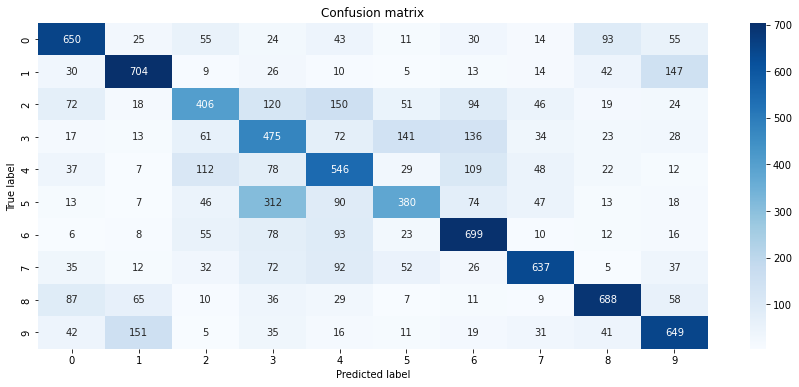

Accuracy: 58.34%
Loss: 1.2065656185150146



In [27]:
predictions = mlp.predict_classes(X_test) 
#predictions = np.argmax(mlp.predict(X_test), axis=-1)
metrics(y_test, y_cat_test, predictions, mlp)

## MLP structure with Batch Normalization

In [10]:
## MLP structure with BatchNormalization

keras.backend.clear_session()
InitSeed = 767
tf.random.set_seed(InitSeed)
np.random.seed(InitSeed)

"""
Dropout is meant to block information from certain neurons completely to make sure the neurons do not co-adapt. 
So, the batch normalization has to be after dropout otherwise you are passing information through 
normalization statistics.

If you think about it, in typical ML problems, this is the reason we don't compute mean and standard deviation 
over entire data and then split it into train, test and validation sets. We split and then compute the statistics 
over the train set and use them to normalize and center the validation and test datasets
"""

def my_design_batch(activate, opt):

    model = Sequential()
    model.add(Flatten(input_shape=[32,32,3]))
    
    model.add(Dense(512, activation=activate, kernel_initializer='uniform')) # Layer 1
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    

    model.add(Dense(512, activation=activate, kernel_initializer='uniform')) # Layer 2
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    
    model.add(Dense(512, activation=activate, kernel_initializer='uniform')) # Layer 3
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    
    model.add(Dense(128, activation=activate, kernel_initializer='uniform')) # Layer 4
    model.add(Dropout(0.4))
    model.add(BatchNormalization())

    model.add(Dense(10, activation='softmax')) # Output layer

    model.compile(loss='categorical_crossentropy',
                  optimizer= opt,
                  metrics=['accuracy']) 

    model.fit(X_train, y_cat_train, epochs=150, batch_size = 500, validation_data=(X_test, y_cat_test), 
              callbacks=[early_stop, LearningRateScheduler(lr_scheduler, verbose=1)])
    
    return model

# MLP structure with Batch Normalization using different activation functions

In [11]:
def main(mlp_b):
    
    losses_b = pd.DataFrame(mlp_b.history.history)
    losses_b["val_accuracy"] = 1 - losses_b["val_accuracy"]
    losses_b["accuracy"] = 1 - losses_b["accuracy"]
    
    predictions = mlp_b.predict_classes(X_test) 
    metrics(y_test, y_cat_test, predictions, mlp_b)
    
    fig, axes = plt.subplots(ncols=2, nrows = 1)

    losses[['accuracy','val_accuracy']].plot(figsize=(20,7), 
                                     title="Train_Accuracy vs Test_Accuracy without Batch Normalization", 
                                     xlabel="Epochs",
                                     ylabel="Accuracy_Score", ax=axes[0])

    losses_b[['accuracy','val_accuracy']].plot(figsize=(20,7), 
                                             title="Train_Accuracy vs Test_Accuracy with Batch Normalization", 
                                             xlabel="Epochs",
                                            ylabel="Accuracy_Score", ax=axes[1])
    fig.show()

Metal device set to: Apple M1


2021-11-04 15:07:26.642594: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-04 15:07:26.642803: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-11-04 15:07:27.125485: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-04 15:07:27.125658: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/150

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.


2021-11-04 15:07:27.432371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 99/100 [============================>.] - ETA: 0s - loss: 2.1775 - accuracy: 0.2489

2021-11-04 15:07:31.060193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 4s 35ms/step - loss: 2.1751 - accuracy: 0.2494 - val_loss: 2.0965 - val_accuracy: 0.3214
Epoch 2/150

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0009993338249474864.
100/100 [==============================] - 3s 34ms/step - loss: 1.8932 - accuracy: 0.3222 - val_loss: 1.7592 - val_accuracy: 0.3940
Epoch 3/150

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000998003131768278.
100/100 [==============================] - 3s 33ms/step - loss: 1.7771 - accuracy: 0.3619 - val_loss: 1.6848 - val_accuracy: 0.4043
Epoch 4/150

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0009960111531758023.
100/100 [==============================] - 3s 33ms/step - loss: 1.7029 - accuracy: 0.3907 - val_loss: 1.5920 - val_accuracy: 0.4360
Epoch 5/150

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0009933622269717819.
100/100 [==============================] - 3s 33ms/step - loss: 1.6553 - accuracy: 0.

100/100 [==============================] - 3s 33ms/step - loss: 1.2353 - accuracy: 0.5616 - val_loss: 1.2516 - val_accuracy: 0.5526
Epoch 38/150

Epoch 00038: LearningRateScheduler reducing learning rate to 0.0006282551475560018.
100/100 [==============================] - 3s 33ms/step - loss: 1.2341 - accuracy: 0.5637 - val_loss: 1.3072 - val_accuracy: 0.5339
Epoch 39/150

Epoch 00039: LearningRateScheduler reducing learning rate to 0.0006127325744974888.
100/100 [==============================] - 3s 33ms/step - loss: 1.2255 - accuracy: 0.5665 - val_loss: 1.2897 - val_accuracy: 0.5417
Epoch 40/150

Epoch 00040: LearningRateScheduler reducing learning rate to 0.0005972052113739428.
100/100 [==============================] - 3s 33ms/step - loss: 1.2141 - accuracy: 0.5713 - val_loss: 1.2447 - val_accuracy: 0.5531
Epoch 41/150

Epoch 00041: LearningRateScheduler reducing learning rate to 0.0005816933646036143.
100/100 [==============================] - 3s 33ms/step - loss: 1.2087 - accurac

Epoch 73/150

Epoch 00073: LearningRateScheduler reducing learning rate to 0.0001782735695045811.
100/100 [==============================] - 3s 33ms/step - loss: 1.0654 - accuracy: 0.6219 - val_loss: 1.1929 - val_accuracy: 0.5712
Epoch 74/150

Epoch 00074: LearningRateScheduler reducing learning rate to 0.00017000021949085985.
100/100 [==============================] - 3s 33ms/step - loss: 1.0644 - accuracy: 0.6257 - val_loss: 1.1983 - val_accuracy: 0.5734
Epoch 75/150

Epoch 00075: LearningRateScheduler reducing learning rate to 0.0001620078312790464.
100/100 [==============================] - 3s 33ms/step - loss: 1.0606 - accuracy: 0.6252 - val_loss: 1.1909 - val_accuracy: 0.5746
Epoch 76/150

Epoch 00076: LearningRateScheduler reducing learning rate to 0.00015429316720526134.
100/100 [==============================] - 3s 33ms/step - loss: 1.0569 - accuracy: 0.6243 - val_loss: 1.1945 - val_accuracy: 0.5746
Epoch 77/150

Epoch 00077: LearningRateScheduler reducing learning rate to 0.0

/opt/homebrew/Caskroom/miniforge/base/envs/tfd/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
2021-11-04 15:12:37.211469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


############################ Classification Report ############################

               precision    recall  f1-score   support

           0       0.66      0.64      0.65      1000
           1       0.69      0.71      0.70      1000
           2       0.51      0.42      0.46      1000
           3       0.40      0.44      0.42      1000
           4       0.51      0.50      0.50      1000
           5       0.49      0.44      0.46      1000
           6       0.57      0.70      0.63      1000
           7       0.68      0.63      0.65      1000
           8       0.67      0.73      0.70      1000
           9       0.64      0.62      0.63      1000

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.58     10000
weighted avg       0.58      0.58      0.58     10000



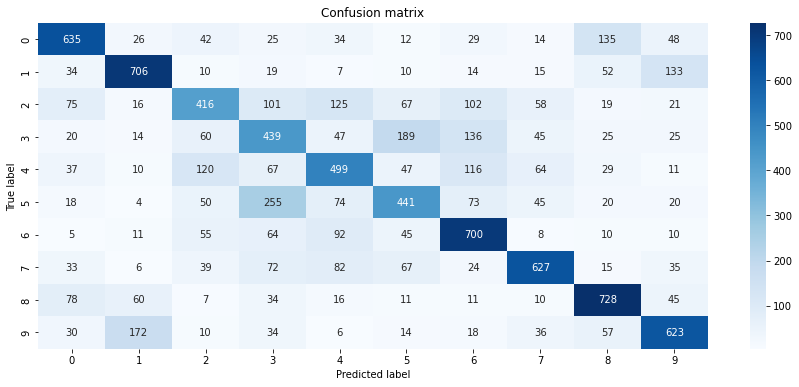

2021-11-04 15:12:39.000678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy: 58.14%
Loss: 1.1822376251220703



NameError: name 'losses' is not defined

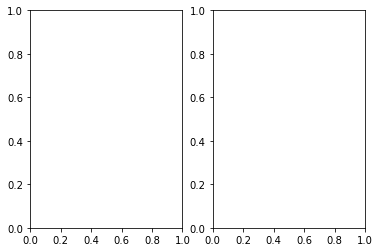

In [12]:
mlp_b = my_design_batch('selu', RMSprop(learning_rate=0.001))
main(mlp_b)

In [ ]:
mlp_b = my_design_batch('selu', Nadam(learning_rate=0.001))
main(mlp_b)

Epoch 1/150

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.


2021-11-04 11:26:43.423196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 99/100 [============================>.] - ETA: 0s - loss: 2.4057 - accuracy: 0.2301

2021-11-04 11:26:49.117253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 6s 59ms/step - loss: 2.4034 - accuracy: 0.2305 - val_loss: 2.0519 - val_accuracy: 0.2823
Epoch 2/150

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0009993338249474864.
100/100 [==============================] - 6s 59ms/step - loss: 1.9937 - accuracy: 0.3055 - val_loss: 1.8136 - val_accuracy: 0.3545
Epoch 3/150

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000998003131768278.
100/100 [==============================] - 6s 58ms/step - loss: 1.8123 - accuracy: 0.3536 - val_loss: 1.6928 - val_accuracy: 0.3960
Epoch 4/150

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0009960111531758023.
100/100 [==============================] - 6s 58ms/step - loss: 1.7018 - accuracy: 0.3938 - val_loss: 1.6382 - val_accuracy: 0.4088
Epoch 5/150

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0009933622269717819.
100/100 [==============================] - 6s 57ms/step - loss: 1.6318 - accuracy: 0.

100/100 [==============================] - 6s 60ms/step - loss: 1.0610 - accuracy: 0.6206 - val_loss: 1.2397 - val_accuracy: 0.5609
Epoch 38/150

Epoch 00038: LearningRateScheduler reducing learning rate to 0.0006282551475560018.
100/100 [==============================] - 6s 60ms/step - loss: 1.0442 - accuracy: 0.6260 - val_loss: 1.2709 - val_accuracy: 0.5520
Epoch 39/150

Epoch 00039: LearningRateScheduler reducing learning rate to 0.0006127325744974888.
100/100 [==============================] - 6s 60ms/step - loss: 1.0365 - accuracy: 0.6281 - val_loss: 1.2337 - val_accuracy: 0.5743
Epoch 40/150

Epoch 00040: LearningRateScheduler reducing learning rate to 0.0005972052113739428.
100/100 [==============================] - 6s 60ms/step - loss: 1.0252 - accuracy: 0.6321 - val_loss: 1.2299 - val_accuracy: 0.5625
Epoch 41/150

Epoch 00041: LearningRateScheduler reducing learning rate to 0.0005816933646036143.
100/100 [==============================] - 6s 62ms/step - loss: 1.0126 - accurac

2021-11-04 11:31:57.688628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


############################ Classification Report ############################

               precision    recall  f1-score   support

           0       0.66      0.60      0.63      1000
           1       0.68      0.71      0.70      1000
           2       0.50      0.41      0.45      1000
           3       0.38      0.46      0.42      1000
           4       0.52      0.51      0.51      1000
           5       0.48      0.47      0.48      1000
           6       0.58      0.69      0.63      1000
           7       0.76      0.56      0.65      1000
           8       0.67      0.72      0.69      1000
           9       0.61      0.65      0.63      1000

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.58     10000
weighted avg       0.58      0.58      0.58     10000



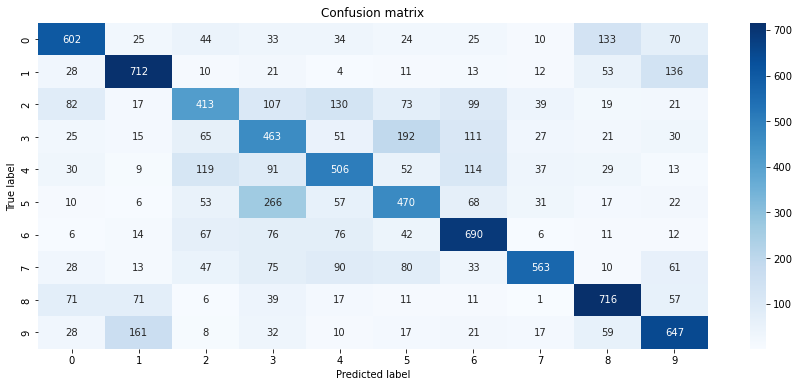

2021-11-04 11:31:59.715858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy: 57.82%
Loss: 1.2236371040344238



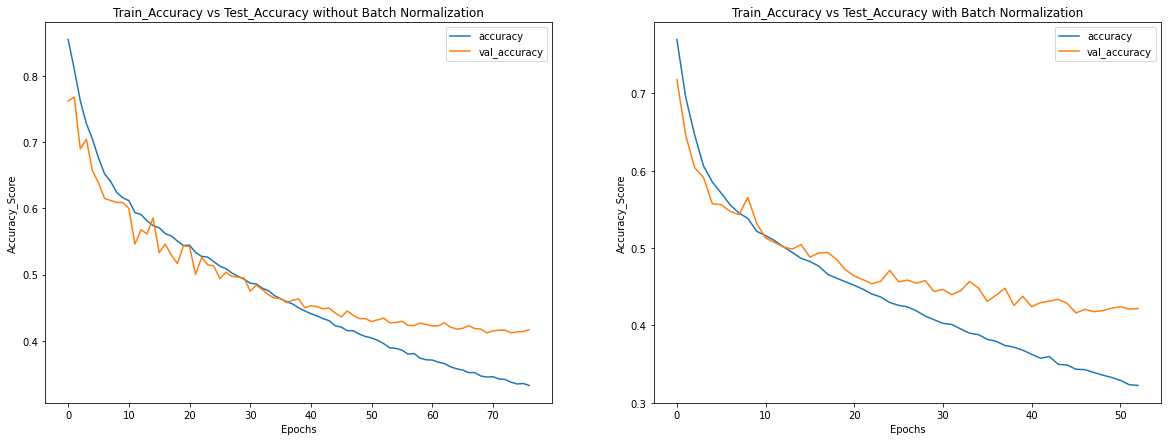

In [24]:
mlp_b = my_design_batch('elu', RMSprop(learning_rate=0.001))
main(mlp_b)

Epoch 1/150

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.


2021-11-04 11:20:49.287252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 2.2676 - accuracy: 0.2484

2021-11-04 11:20:55.244048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 7s 61ms/step - loss: 2.2676 - accuracy: 0.2484 - val_loss: 1.9275 - val_accuracy: 0.3431
Epoch 2/150

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0009993338249474864.
100/100 [==============================] - 6s 60ms/step - loss: 1.9010 - accuracy: 0.3269 - val_loss: 1.6881 - val_accuracy: 0.3932
Epoch 3/150

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000998003131768278.
100/100 [==============================] - 6s 60ms/step - loss: 1.7648 - accuracy: 0.3709 - val_loss: 1.6611 - val_accuracy: 0.4109
Epoch 4/150

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0009960111531758023.
100/100 [==============================] - 6s 60ms/step - loss: 1.6790 - accuracy: 0.3998 - val_loss: 1.6284 - val_accuracy: 0.4149
Epoch 5/150

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0009933622269717819.
100/100 [==============================] - 6s 60ms/step - loss: 1.6252 - accuracy: 0.

100/100 [==============================] - 6s 63ms/step - loss: 1.1264 - accuracy: 0.5962 - val_loss: 1.2117 - val_accuracy: 0.5624
Epoch 38/150

Epoch 00038: LearningRateScheduler reducing learning rate to 0.0006282551475560018.
100/100 [==============================] - 6s 62ms/step - loss: 1.1166 - accuracy: 0.6017 - val_loss: 1.2533 - val_accuracy: 0.5529
Epoch 39/150

Epoch 00039: LearningRateScheduler reducing learning rate to 0.0006127325744974888.
100/100 [==============================] - 6s 63ms/step - loss: 1.1045 - accuracy: 0.6036 - val_loss: 1.2174 - val_accuracy: 0.5709
Epoch 40/150

Epoch 00040: LearningRateScheduler reducing learning rate to 0.0005972052113739428.
100/100 [==============================] - 7s 67ms/step - loss: 1.0978 - accuracy: 0.6090 - val_loss: 1.2094 - val_accuracy: 0.5647
Epoch 41/150

Epoch 00041: LearningRateScheduler reducing learning rate to 0.0005816933646036143.
100/100 [==============================] - 6s 64ms/step - loss: 1.0868 - accurac

2021-11-04 11:26:37.678939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


############################ Classification Report ############################

               precision    recall  f1-score   support

           0       0.66      0.58      0.62      1000
           1       0.71      0.67      0.69      1000
           2       0.47      0.44      0.45      1000
           3       0.43      0.35      0.38      1000
           4       0.47      0.54      0.50      1000
           5       0.48      0.47      0.47      1000
           6       0.59      0.64      0.61      1000
           7       0.72      0.57      0.63      1000
           8       0.54      0.82      0.65      1000
           9       0.66      0.58      0.62      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.56     10000
weighted avg       0.57      0.57      0.56     10000



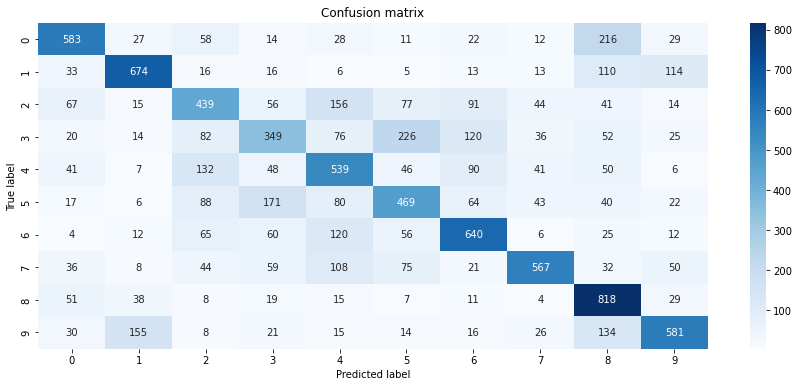

2021-11-04 11:26:39.695890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy: 56.59%
Loss: 1.2259762287139893



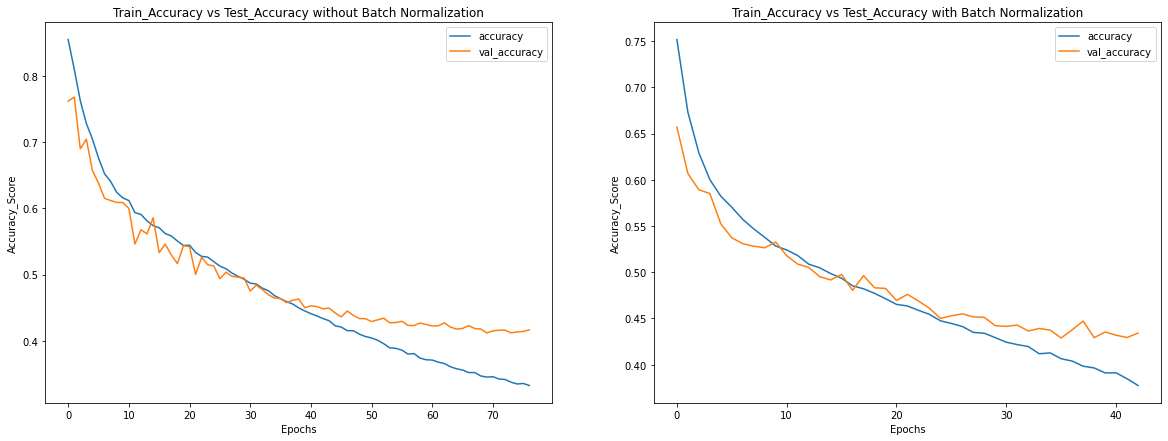

In [23]:
mlp_b = my_design_batch('elu', Nadam(learning_rate=0.001))
main(mlp_b)

Epoch 1/150

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.


2021-11-04 11:35:43.579172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 99/100 [============================>.] - ETA: 0s - loss: 2.3165 - accuracy: 0.2359

2021-11-04 11:35:47.772211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 5s 42ms/step - loss: 2.3139 - accuracy: 0.2364 - val_loss: 1.8965 - val_accuracy: 0.3368
Epoch 2/150

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0009993338249474864.
100/100 [==============================] - 4s 37ms/step - loss: 1.9962 - accuracy: 0.3031 - val_loss: 1.9575 - val_accuracy: 0.3047
Epoch 3/150

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000998003131768278.
100/100 [==============================] - 4s 35ms/step - loss: 1.8729 - accuracy: 0.3360 - val_loss: 1.7374 - val_accuracy: 0.3689
Epoch 4/150

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0009960111531758023.
100/100 [==============================] - 4s 40ms/step - loss: 1.8120 - accuracy: 0.3602 - val_loss: 1.7577 - val_accuracy: 0.3745
Epoch 5/150

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0009933622269717819.
100/100 [==============================] - 4s 40ms/step - loss: 1.7676 - accuracy: 0.

100/100 [==============================] - 4s 41ms/step - loss: 1.4313 - accuracy: 0.4861 - val_loss: 1.3963 - val_accuracy: 0.5035
Epoch 38/150

Epoch 00038: LearningRateScheduler reducing learning rate to 0.0006282551475560018.
100/100 [==============================] - 4s 41ms/step - loss: 1.4279 - accuracy: 0.4899 - val_loss: 1.4362 - val_accuracy: 0.4876
Epoch 39/150

Epoch 00039: LearningRateScheduler reducing learning rate to 0.0006127325744974888.
100/100 [==============================] - 4s 41ms/step - loss: 1.4223 - accuracy: 0.4881 - val_loss: 1.3949 - val_accuracy: 0.5023
Epoch 40/150

Epoch 00040: LearningRateScheduler reducing learning rate to 0.0005972052113739428.
100/100 [==============================] - 4s 41ms/step - loss: 1.4215 - accuracy: 0.4934 - val_loss: 1.4119 - val_accuracy: 0.4911
Epoch 41/150

Epoch 00041: LearningRateScheduler reducing learning rate to 0.0005816933646036143.
100/100 [==============================] - 4s 40ms/step - loss: 1.4138 - accurac

2021-11-04 11:39:39.173324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


############################ Classification Report ############################

               precision    recall  f1-score   support

           0       0.57      0.62      0.59      1000
           1       0.69      0.58      0.63      1000
           2       0.38      0.45      0.41      1000
           3       0.33      0.41      0.37      1000
           4       0.45      0.48      0.46      1000
           5       0.48      0.34      0.40      1000
           6       0.53      0.60      0.56      1000
           7       0.65      0.53      0.58      1000
           8       0.62      0.69      0.65      1000
           9       0.65      0.50      0.56      1000

    accuracy                           0.52     10000
   macro avg       0.53      0.52      0.52     10000
weighted avg       0.53      0.52      0.52     10000



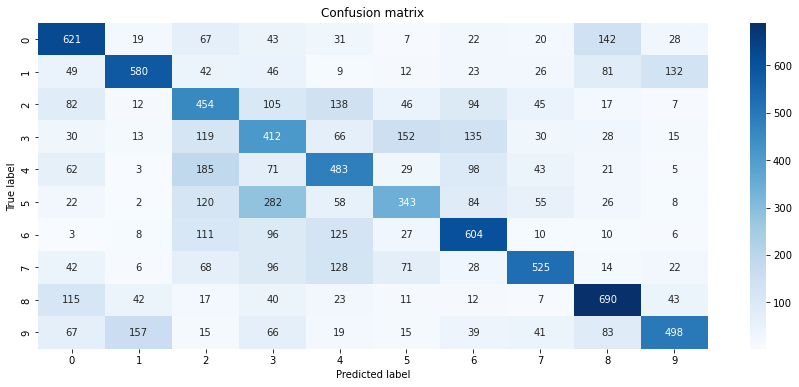

2021-11-04 11:39:40.417019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy: 52.1%
Loss: 1.3446145057678223



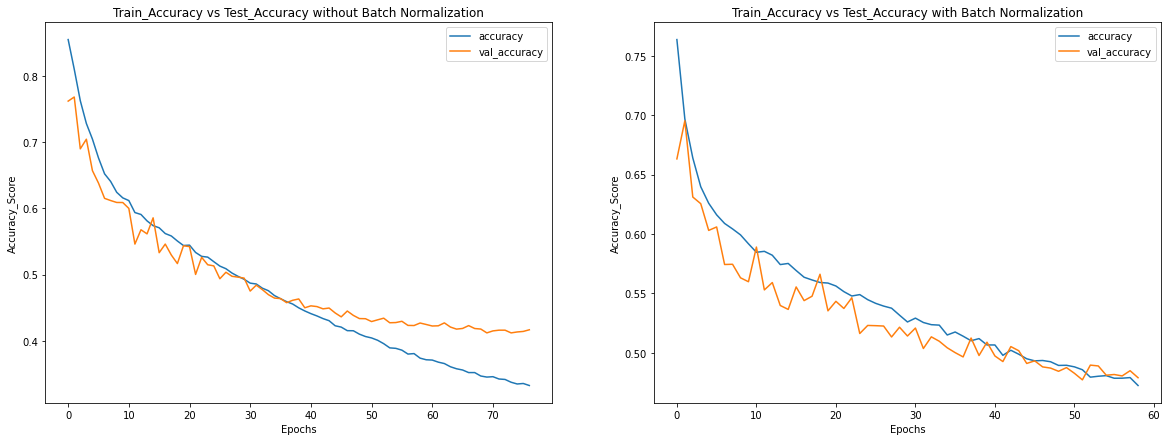

In [26]:
mlp_b = my_design_batch('relu', RMSprop(learning_rate=0.001))
main(mlp_b)

Epoch 1/150

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.


2021-11-04 11:32:03.551933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 2.2932 - accuracy: 0.2339

2021-11-04 11:32:08.945427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 6s 54ms/step - loss: 2.2932 - accuracy: 0.2339 - val_loss: 2.0358 - val_accuracy: 0.2848
Epoch 2/150

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0009993338249474864.
100/100 [==============================] - 5s 53ms/step - loss: 1.9424 - accuracy: 0.3112 - val_loss: 1.8765 - val_accuracy: 0.3205
Epoch 3/150

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000998003131768278.
100/100 [==============================] - 5s 53ms/step - loss: 1.8490 - accuracy: 0.3385 - val_loss: 1.9224 - val_accuracy: 0.3188
Epoch 4/150

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0009960111531758023.
100/100 [==============================] - 5s 53ms/step - loss: 1.8080 - accuracy: 0.3512 - val_loss: 1.7000 - val_accuracy: 0.3874
Epoch 5/150

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0009933622269717819.
100/100 [==============================] - 5s 53ms/step - loss: 1.7694 - accuracy: 0.

100/100 [==============================] - 5s 53ms/step - loss: 1.4142 - accuracy: 0.4918 - val_loss: 1.3939 - val_accuracy: 0.5014
Epoch 38/150

Epoch 00038: LearningRateScheduler reducing learning rate to 0.0006282551475560018.
100/100 [==============================] - 5s 52ms/step - loss: 1.4073 - accuracy: 0.4957 - val_loss: 1.3957 - val_accuracy: 0.4963
Epoch 39/150

Epoch 00039: LearningRateScheduler reducing learning rate to 0.0006127325744974888.
100/100 [==============================] - 5s 48ms/step - loss: 1.4037 - accuracy: 0.4951 - val_loss: 1.4020 - val_accuracy: 0.5000
Epoch 40/150

Epoch 00040: LearningRateScheduler reducing learning rate to 0.0005972052113739428.
100/100 [==============================] - 5s 49ms/step - loss: 1.3954 - accuracy: 0.4988 - val_loss: 1.4046 - val_accuracy: 0.4922
Epoch 41/150

Epoch 00041: LearningRateScheduler reducing learning rate to 0.0005816933646036143.
100/100 [==============================] - 5s 53ms/step - loss: 1.3954 - accurac

2021-11-04 11:35:39.639828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


############################ Classification Report ############################

               precision    recall  f1-score   support

           0       0.66      0.41      0.51      1000
           1       0.75      0.39      0.51      1000
           2       0.36      0.41      0.38      1000
           3       0.34      0.35      0.34      1000
           4       0.39      0.53      0.45      1000
           5       0.44      0.41      0.43      1000
           6       0.49      0.62      0.55      1000
           7       0.64      0.45      0.53      1000
           8       0.51      0.78      0.61      1000
           9       0.58      0.56      0.57      1000

    accuracy                           0.49     10000
   macro avg       0.52      0.49      0.49     10000
weighted avg       0.52      0.49      0.49     10000



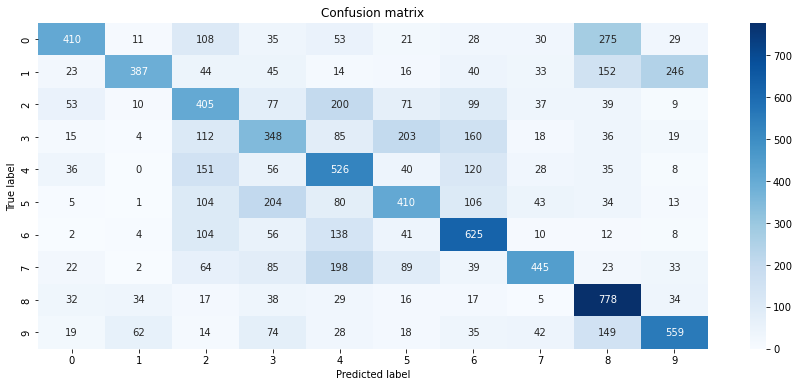

2021-11-04 11:35:40.775954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy: 48.93%
Loss: 1.4365835189819336



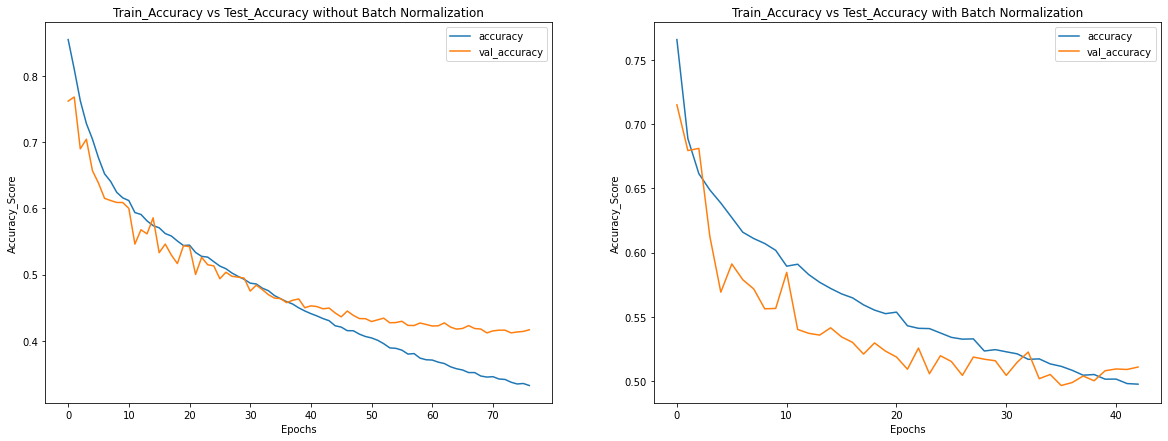

In [25]:
mlp_b = my_design_batch('relu', Nadam(learning_rate=0.001))
main(mlp_b)